<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe67701-uncertainty-quantification](https://ndcbe.github.io/cbe67701-uncertainty-quantification);
content is available [on Github](https://github.com/ndcbe/cbe67701-uncertainty-quantification.git).*

<!--NAVIGATION-->
< [2.1 Multivariate Distributions: Example from Texbook](https://ndcbe.github.io/cbe67701-uncertainty-quantification/02.01-Contributed-Example.html) | [Contents](toc.html) | [3.0 Input Parameter Distributions](https://ndcbe.github.io/cbe67701-uncertainty-quantification/03.00-Input-Parameter-Distributions.html)<p><a href="https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/02.02-Contributed-Example.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe67701-uncertainty-quantification/02.02-Contributed-Example.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 2.2 Rejection Sampling, Skewness, and Kurtosis

Created by Michael Vander Wal (mvander5@nd.edu)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## 2.2.1 Rejection Sampling for a Standard Normal Distribution

The following section demonstrates how to do rejection sampling with an available pdf.
    The distribution used is a standard normal. Rejection sampling is truly a foolish thing to do for
    the standard normal because we can directly sample from it.

In [2]:
def rejection_sample(nSamples,sampleArea,distribution):
    ''' Simple rejection sampling code
    
    Arguments:
        nSamples: number of samples [integer]
        sampleArea: bounds for sample area [list/array with 4 elements]
            sampleArea[0]: lower bound for x
            sampleArea[1]: upper bound for x
            sampleArea[2]: lower bound for y
            sampleArea[3]: upper bound for y
        distribution: distribution object from numpy.stats
        
    Returns:
        numpy array of accepted samples
        numpy array of rejected samples
        numpy array of rejection rate
    '''
    accepted = 0
    rejected = 0
    acceptedSamples = []
    rejectedSamples = []
    while accepted < nSamples:
        x = np.random.uniform(sampleArea[0],sampleArea[1])
        y = np.random.uniform(sampleArea[2],sampleArea[3])
        if y <= distribution.pdf(x):
            accepted += 1
            acceptedSamples.append([x,y])
        else:
            rejected += 1
            rejectedSamples.append([x,y])
    rejectionRate = rejected/(rejected+accepted)
    return np.array(acceptedSamples),np.array(rejectedSamples), np.array(rejectionRate)

Rejection Rate for Plot 1 is 0.899497


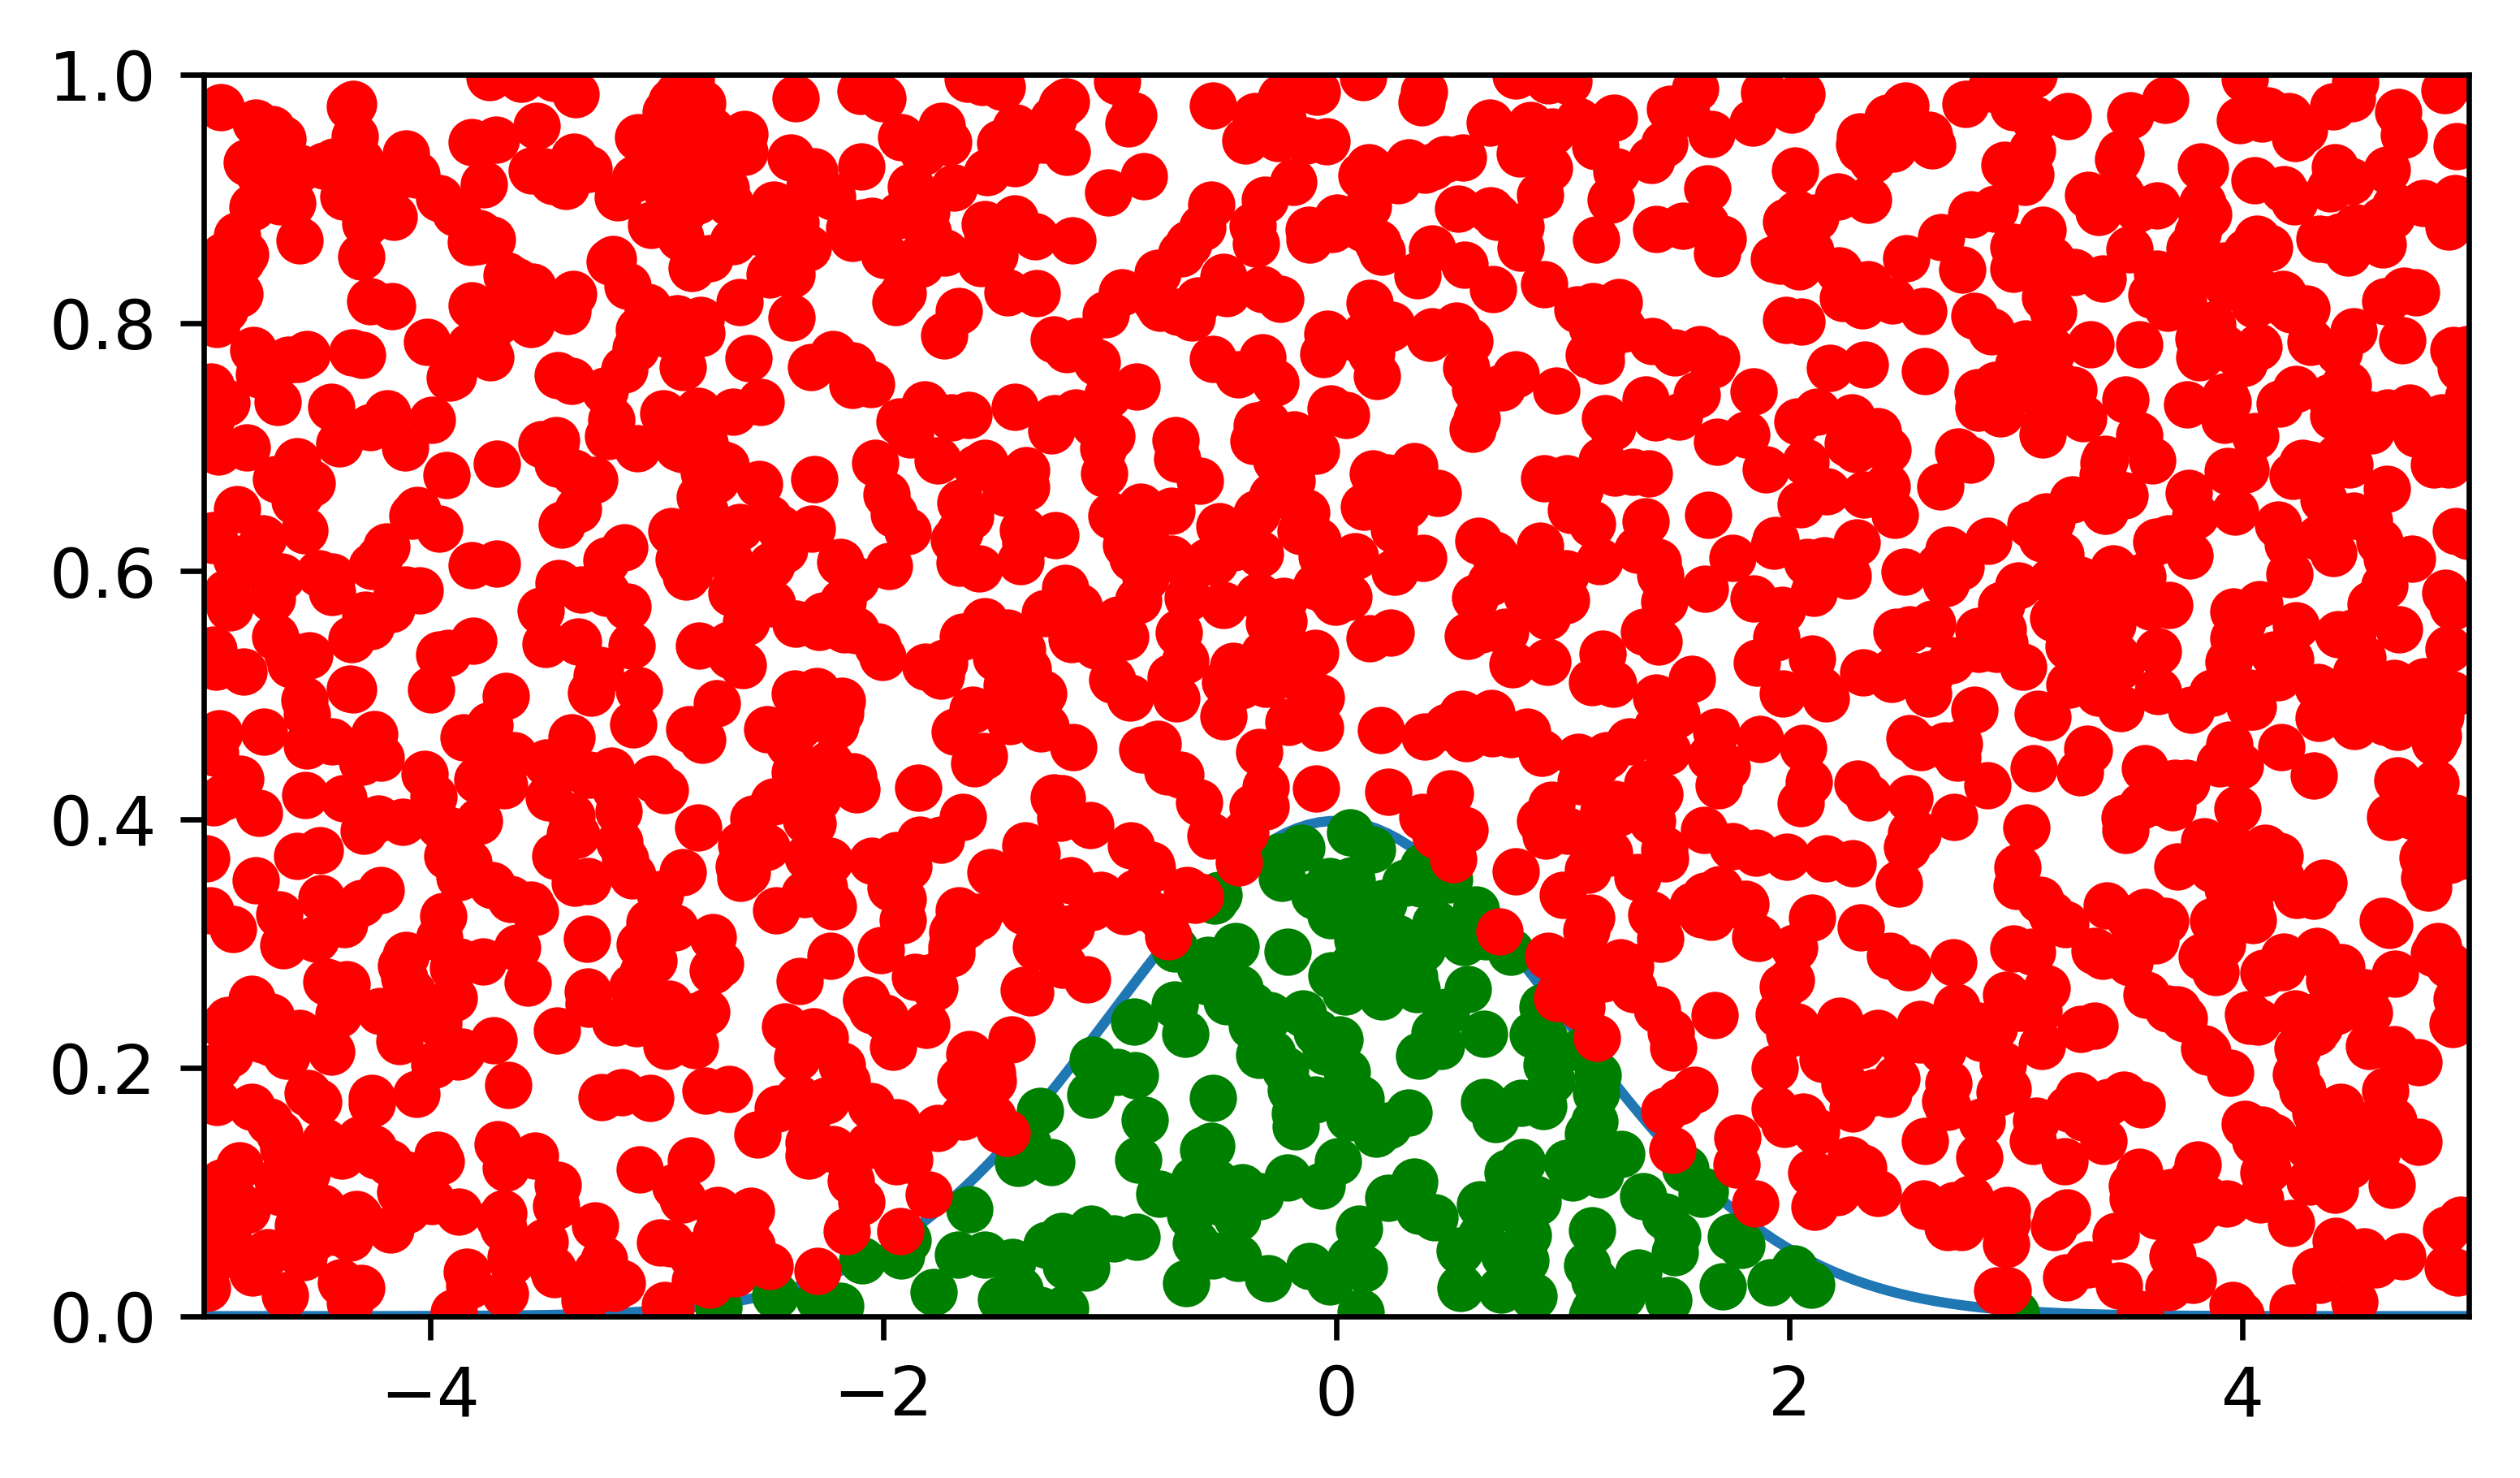

In [3]:
nSamples = 200
sampleArea = [-5,5,0,1]
std = 1
mean = 0

dist = stats.norm(loc=0,scale=1)
pdfX = np.linspace(sampleArea[0],sampleArea[1],200)
pdfY = dist.pdf(pdfX)
acceptedSamples,rejectedSamples,rejectionRate = rejection_sample(nSamples,sampleArea,dist)
fig,ax = plt.subplots(figsize = (6,3.375), dpi=600)
ax.plot(pdfX,pdfY,acceptedSamples[:,0],acceptedSamples[:,1],'og',rejectedSamples[:,0],rejectedSamples[:,1],'or',label="Plot 1")
ax.set_ylim(sampleArea[2],sampleArea[3])
ax.set_xlim(sampleArea[0],sampleArea[1])
print("Rejection Rate for Plot 1 is %f"%(rejectionRate))

Rejection Rate for Plot 1 is 0.749373


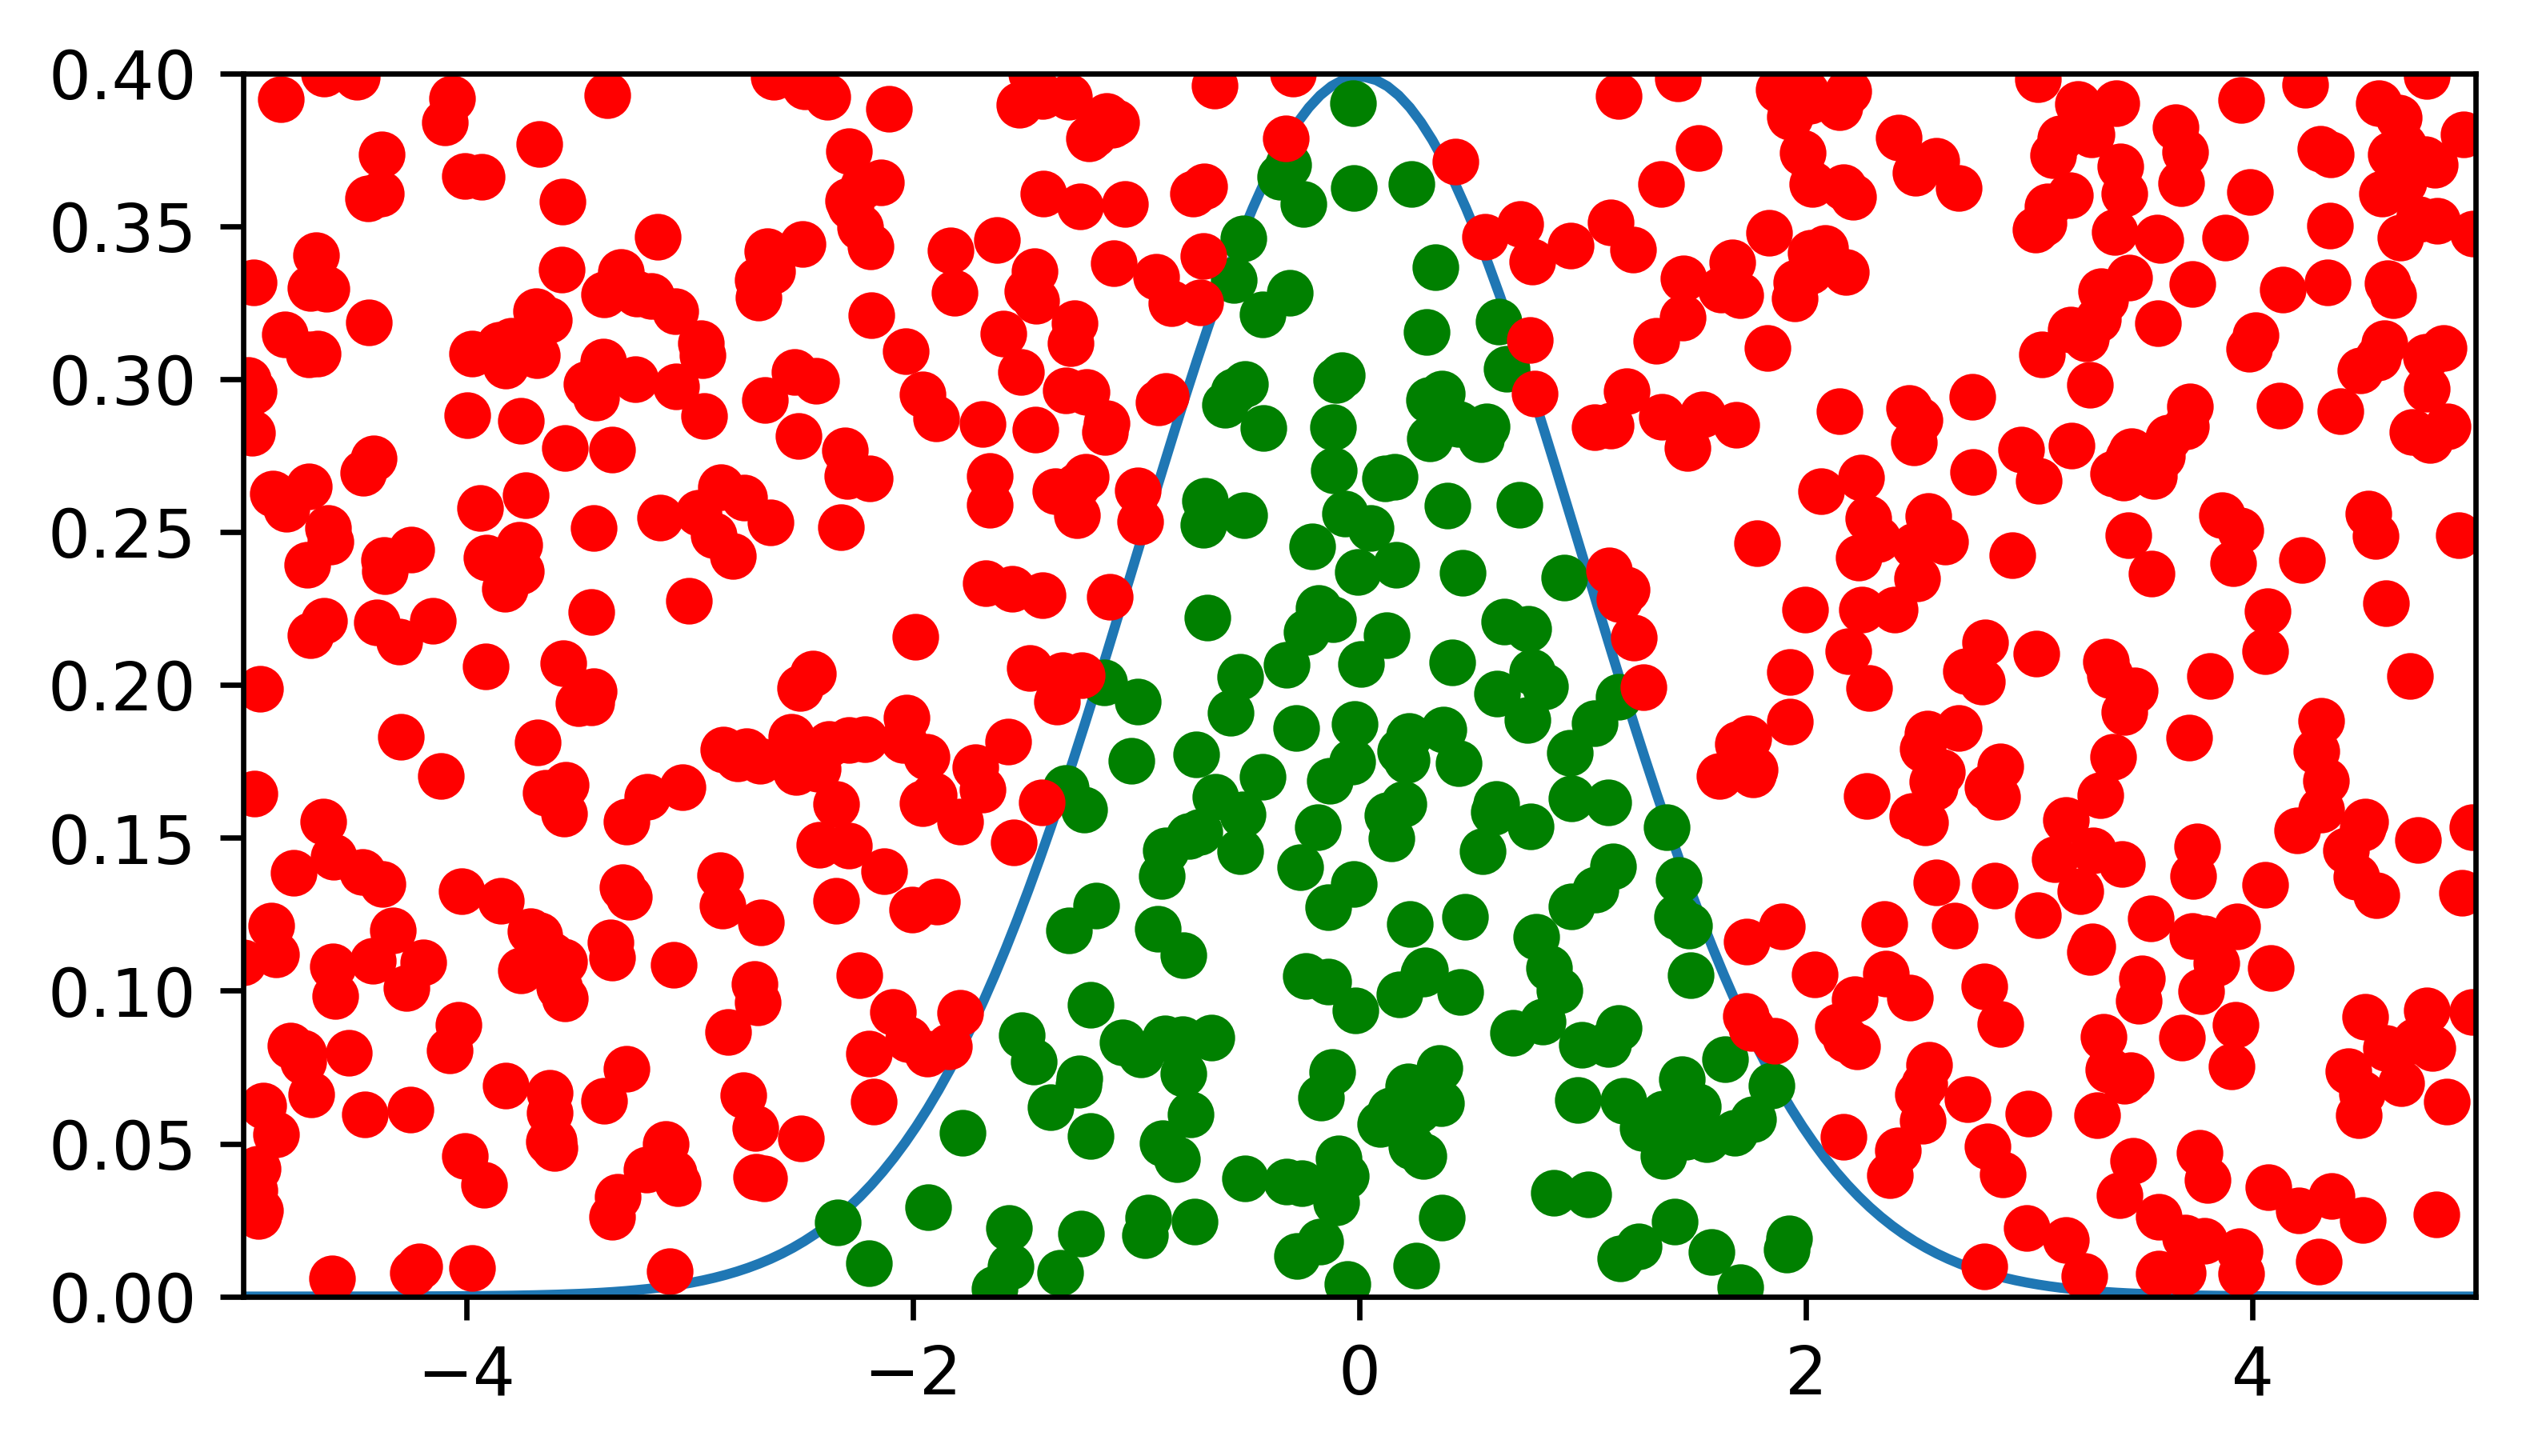

In [4]:
nSamples = 200
sampleArea = [-5,5,0,.4]
std = 1
mean = 0

dist = stats.norm(loc=0,scale=1)
pdfX = np.linspace(sampleArea[0],sampleArea[1],200)
pdfY = dist.pdf(pdfX)
acceptedSamples,rejectedSamples,rejectionRate = rejection_sample(nSamples,sampleArea,dist)
fig,ax = plt.subplots(figsize = (6,3.375), dpi=600)
ax.plot(pdfX,pdfY,acceptedSamples[:,0],acceptedSamples[:,1],'og',rejectedSamples[:,0],rejectedSamples[:,1],'or',label="Plot 2")
ax.set_ylim(sampleArea[2],sampleArea[3])
ax.set_xlim(sampleArea[0],sampleArea[1])
print("Rejection Rate for Plot 1 is %f"%(rejectionRate))

Rejection Rate for Plot 1 is 0.546485


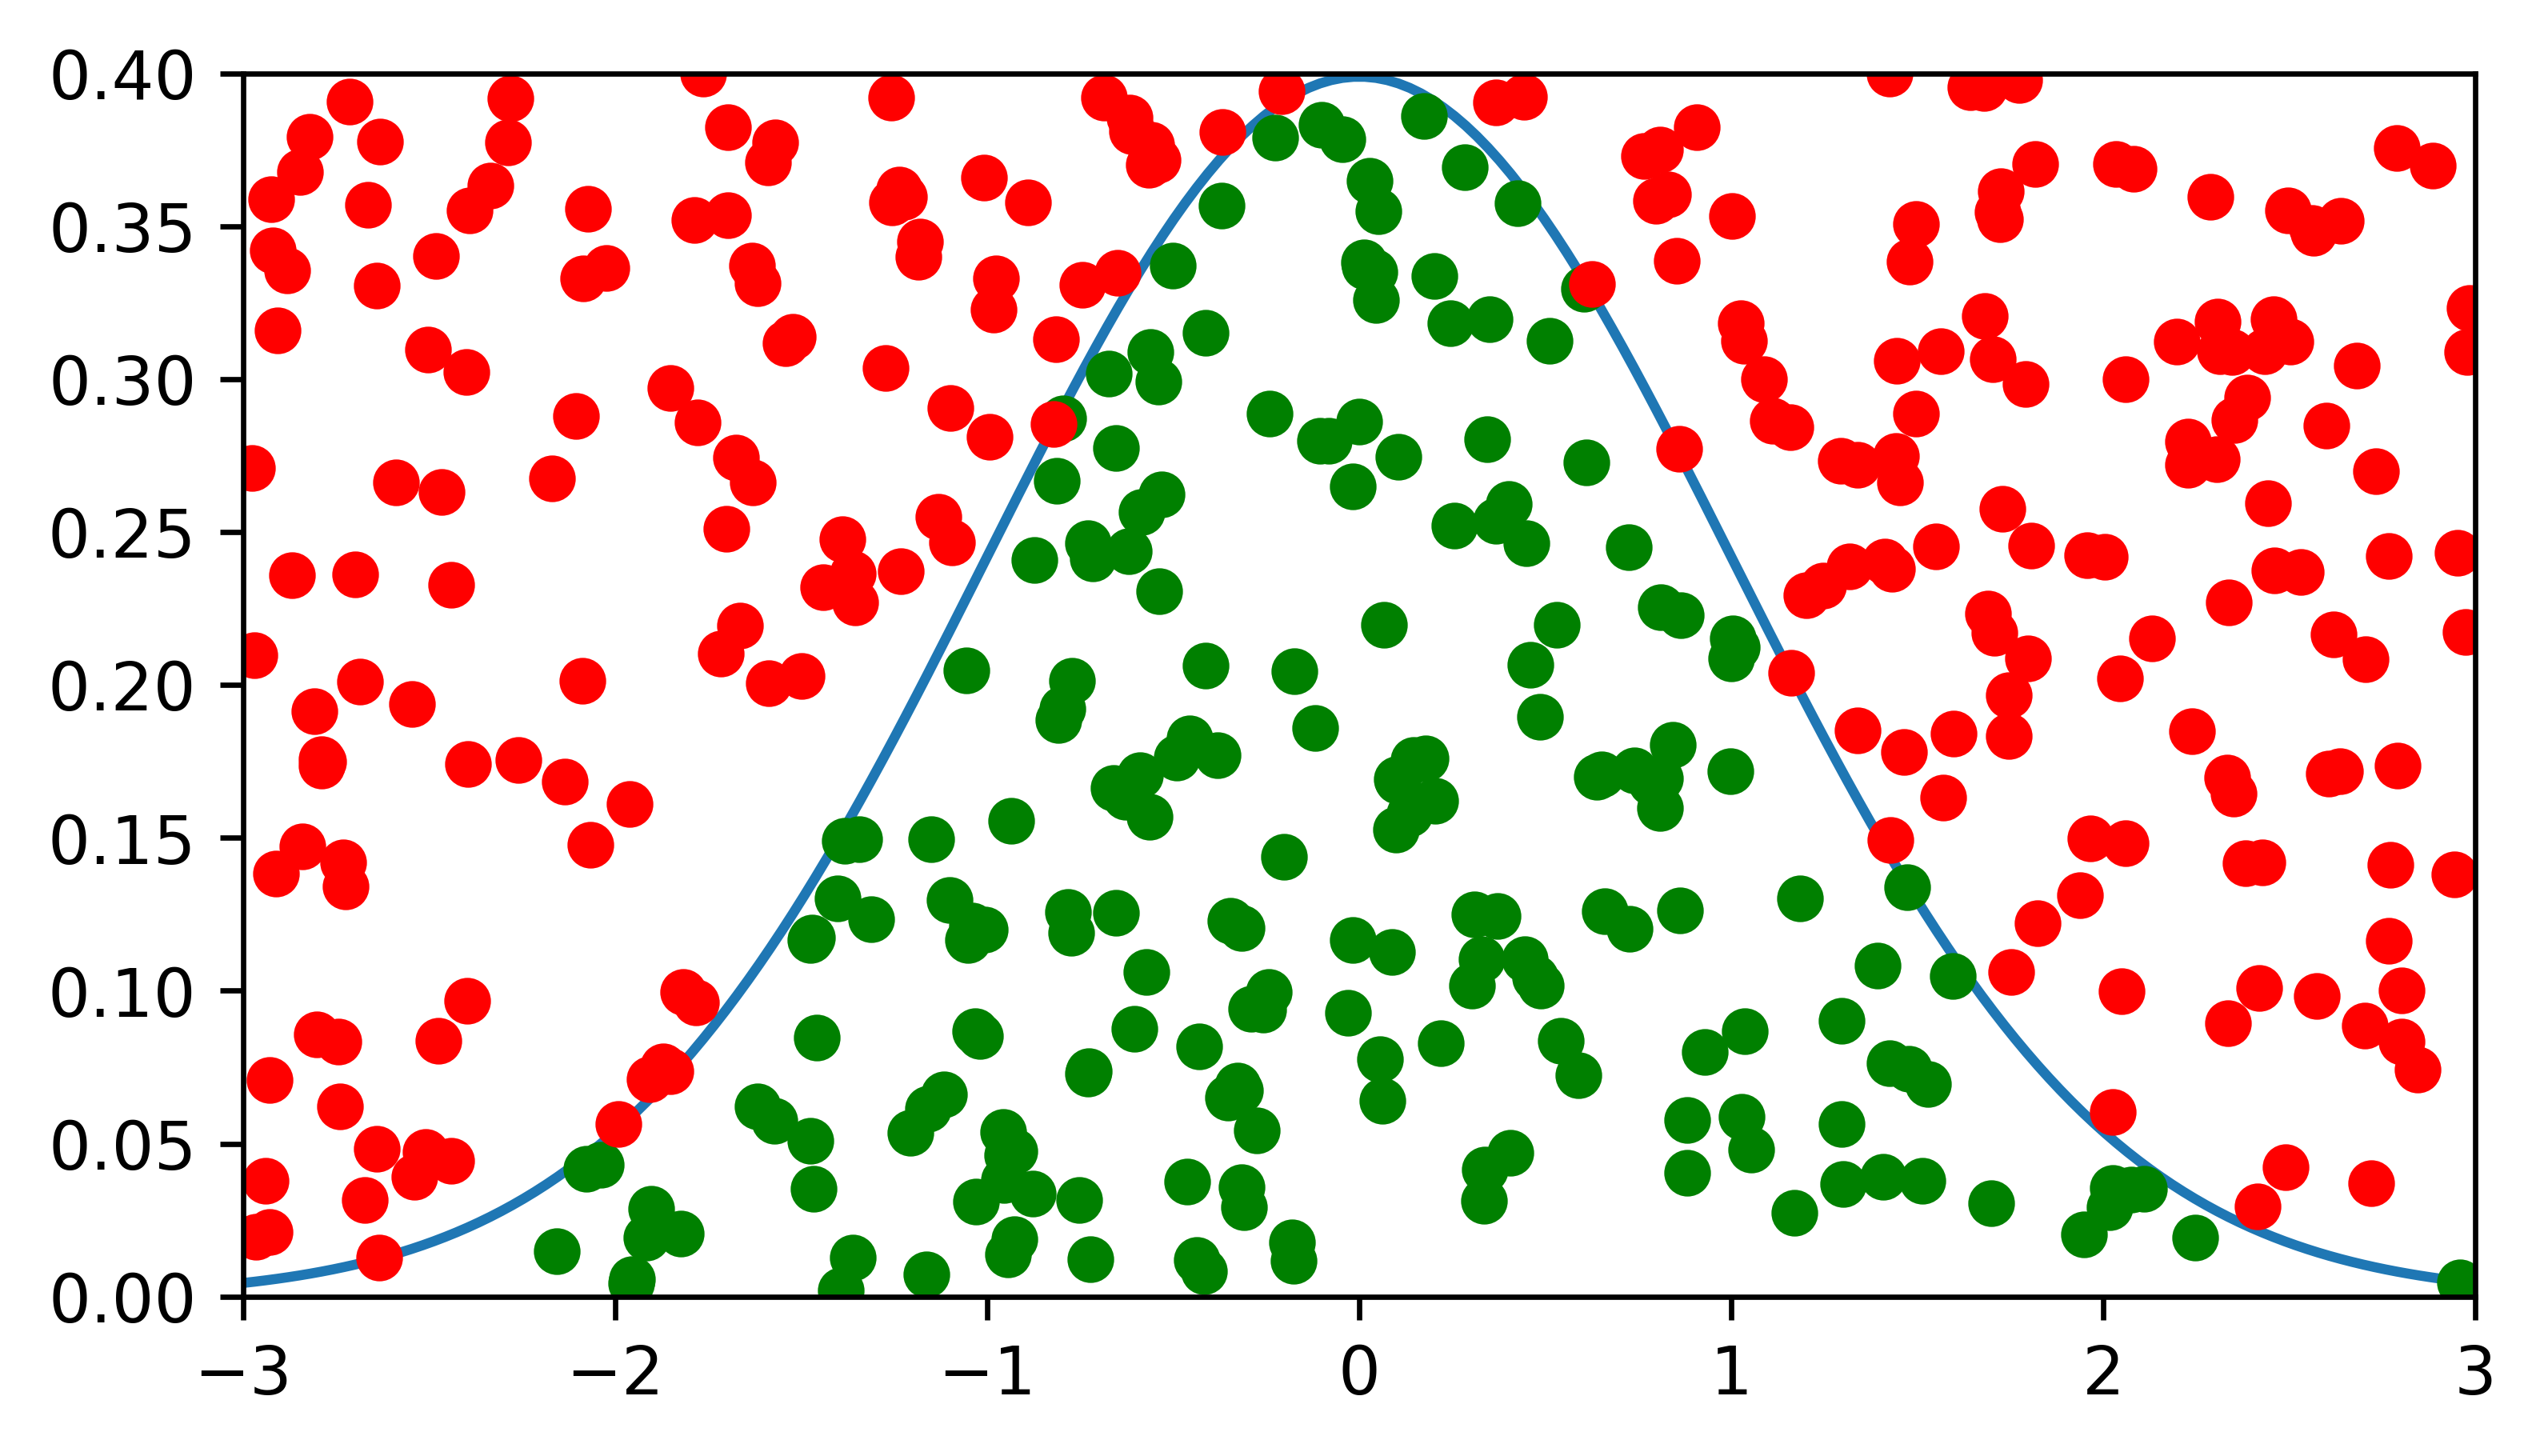

In [5]:
nSamples = 200
sampleArea = [-3,3,0,.4]
std = 1
mean = 0

dist = stats.norm(loc=0,scale=1)
pdfX = np.linspace(sampleArea[0],sampleArea[1],200)
pdfY = dist.pdf(pdfX)
acceptedSamples,rejectedSamples,rejectionRate = rejection_sample(nSamples,sampleArea,dist)
fig,ax = plt.subplots(figsize = (6,3.375), dpi=600)
ax.plot(pdfX,pdfY,acceptedSamples[:,0],acceptedSamples[:,1],'og',rejectedSamples[:,0],rejectedSamples[:,1],'or',label="Plot 3")
ax.set_ylim(sampleArea[2],sampleArea[3])
ax.set_xlim(sampleArea[0],sampleArea[1])
print("Rejection Rate for Plot 1 is %f"%(rejectionRate))

## 2.2.2 Skewness and Kurtosis

The following section shows how mean, variance, skew, and kurtosis change with the number of samples taken.

In [6]:
def skew(data):
    m = data.mean()
    v = data.var()
    expect = np.power((data-m),3).mean()
    s = expect/v**(3./2.)
    return s

def kurt(data):
    m = data.mean()
    v = data.var()
    expect = np.power((data-m),4).mean()
    k = expect/v**2. - 3
    return k

In [7]:
nSamples = np.array([100,1000,5000,10000,100000])
mNorm = []
mGam = []
vNorm = []
vGam = []
sNorm = []
sGam = []
kNorm = []
kGam = []
for i in nSamples:
    samplesNorm = np.random.normal(loc=0,scale=10,size=(i,))
    samplesGam = np.random.gamma(shape=.5,scale=1,size=(i,))
    mNorm.append(samplesNorm.mean())
    mGam.append(samplesGam.mean())
    vNorm.append(samplesGam.var())
    vGam.append(samplesGam.var())
    sNorm.append(skew(samplesNorm))
    sGam.append(skew(samplesGam))
    kNorm.append(kurt(samplesNorm))
    kGam.append(kurt(samplesGam))
print(f"The means of the normal distribution are {mNorm}")
print(f"\nThe means of the gamma distribution are {mGam}")
print(f"\nThe variances of the normal distribution are {vNorm}")
print(f"\nThe variances of the gamma distribution are {vGam}")
print(f"\nThe skews of the normal distribution are {sNorm}")
print(f"\nThe skews of the gamma distribution are {sGam}")
print(f"\nThe kurtoses of the normal distribution are {kNorm}")
print(f"\nThe kurtoses of the gamma distribution are {kGam}")

The means of the normal distribution are [-0.2275947376849782, 0.14490278145846391, -0.20312050264586828, 0.1850929655680419, 0.024330696533491337]

The means of the gamma distribution are [0.4969620838359299, 0.4885950384852711, 0.4958359209581951, 0.5034932244061876, 0.5009528157840336]

The variances of the normal distribution are [0.39617820037119117, 0.44975698233178946, 0.4819184394830365, 0.5136726459373758, 0.4969728999152947]

The variances of the gamma distribution are [0.39617820037119117, 0.44975698233178946, 0.4819184394830365, 0.5136726459373758, 0.4969728999152947]

The skews of the normal distribution are [0.24333730059254116, 0.029070284803798387, -0.04048748617021249, -0.04089706743950303, 0.001674866963001851]

The skews of the gamma distribution are [2.0689763049558008, 3.048369436644069, 2.6286580150479137, 2.8271124175405227, 2.7621430918523786]

The kurtoses of the normal distribution are [-0.1476144909688597, -0.13232327575449832, -0.05208581138559287, -0.045862

<!--NAVIGATION-->
< [2.1 Multivariate Distributions: Example from Texbook](https://ndcbe.github.io/cbe67701-uncertainty-quantification/02.01-Contributed-Example.html) | [Contents](toc.html) | [3.0 Input Parameter Distributions](https://ndcbe.github.io/cbe67701-uncertainty-quantification/03.00-Input-Parameter-Distributions.html)<p><a href="https://colab.research.google.com/github/ndcbe/cbe67701-uncertainty-quantification/blob/master/docs/02.02-Contributed-Example.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/cbe67701-uncertainty-quantification/02.02-Contributed-Example.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>